In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
dataframe = pd.read_csv("data/mammogram.csv")
dataframe.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,-100000,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,-100000,1


In [3]:
dataframe

,BI_RADS_assessment,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,-100000,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,-100000,1
...,...,...,...,...,...,...
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1


In [4]:
class_names = list(np.unique(dataframe.values[:,5]))
class_names

[0, 1]

In [5]:
dataframe.drop(dataframe[
        (dataframe.BI_RADS_assessment == -100000) |
        (dataframe.age == -100000) |
        (dataframe.shape == -100000) |
        (dataframe.margin == -100000) |
        (dataframe.density == -100000) |
        (dataframe.severity == -100000)
    ].index,
    inplace=True
)

dataframe.drop(dataframe[
        (dataframe.BI_RADS_assessment == 6) |
        (dataframe.BI_RADS_assessment == 55) |
        (dataframe.BI_RADS_assessment == 0)
    ].index,
    inplace=True
)

dataframe


,BI_RADS_assessment,age,shape,margin,density,severity
0,5,67,3,5,3,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
8,5,57,1,5,3,1
9,5,60,-100000,5,1,1
...,...,...,...,...,...,...
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1


In [6]:
data = dataframe.values[:,:5]
data_columns = list(dataframe.columns.values[:5])

target=dataframe.values[:,5]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)
print(X_train)

[[ 5 61  4  5  3]
 [ 5 52  4  4  3]
 [ 5 63  3  4  3]
 ...
 [ 4 69  1  1  3]
 [ 4 64  4  5  3]
 [ 4 71  4  4  3]]


In [8]:
classification = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3
)

classification = classification.fit(X_train, y_train)
y_pred = classification.predict(X_test)


In [9]:
dataframe["severity"] = ["True" if i == 1 else "False" for i in dataframe["severity"]]
dataframe["severity"]

0       True
2       True
3      False
8       True
9       True
       ...  
956    False
957     True
958    False
959     True
960    False
Name: severity, Length: 831, dtype: object

The accuracy is of: 0.856


C:\Users\LAUTARO\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


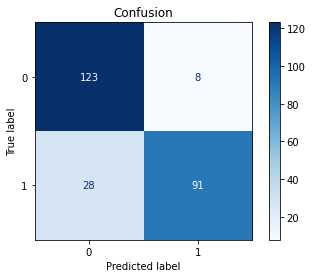

In [10]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"The accuracy is of: {accuracy}")

disp = metrics.plot_confusion_matrix(classification, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion')

plt.show()

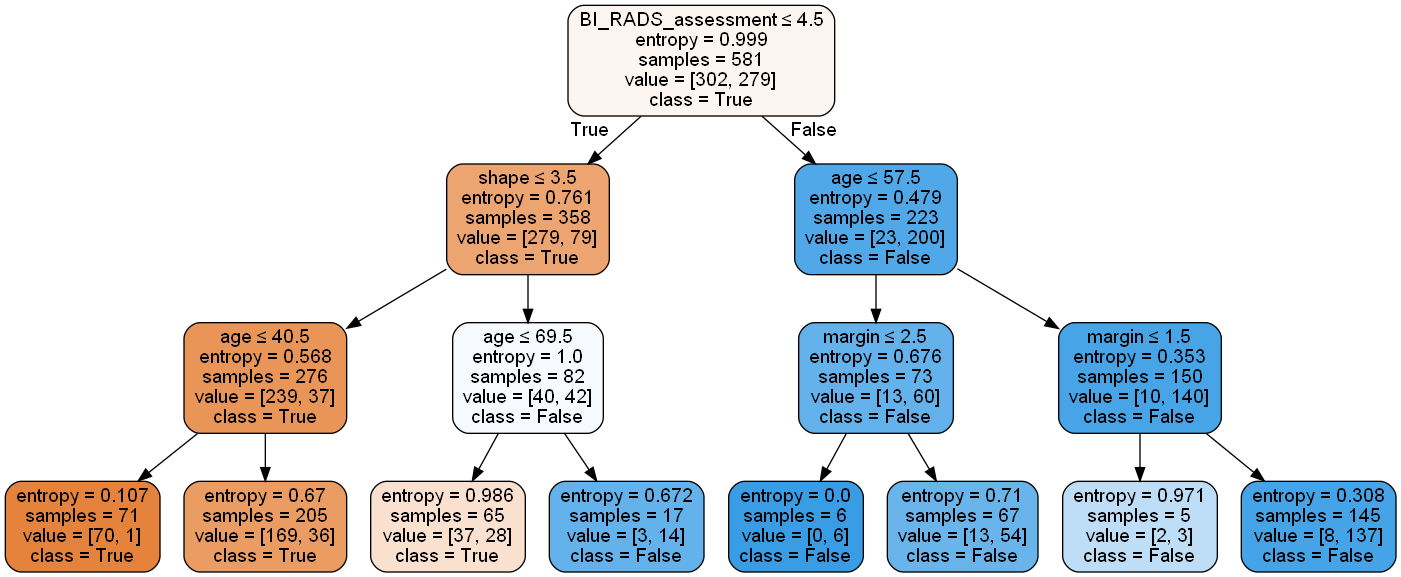

In [11]:
class_names = ["True", "False"]

dot_data = StringIO()

export_graphviz(
    classification, out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=data_columns,
    class_names=class_names
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


¿Se logró una exactitud mayor que con aprendizaje bayesiano?
Se logro una precision menor que en aprendizaje bayesiano pero pudimos obtener todos los datos no como nos ocurria en el ejercicio de aprendizaje bayesiano ya que al trabajar con redes neuronales no provocan errores

¿Cuál es la profundidad óptima del árbol?
La profundidad optima del arbol es de 3

¿Cuanta diferencia en la exactitud del resultado existe con los métodos de ganancia y gini?
Existe una diferencia de exactitud con el metodo de gini de un 0.856